# Assignment - 2

Group Name: PA-23- Group13
    
Group Members:
    
    Hari Krishnan Suresh Varma - 22056724
    
    Krishnakanth Kuruvachira Sabu - 22078053
    
    Athira Chathananickal Sajeevan - 22083863
    
    Mariya Sabu - 22069689
    

## DECLARATION

By including this statement, we the authors of this work, verify that:

-I hold a copy of this assignment that we can produce if the original is lost or damaged.

-I hereby certify that no part of this assignment/product has been copied from any other student’s work or from any other source except where due acknowledgement is made in the assignment.

-No part of this assignment/product has been written/produced for us by another person except where such collaboration has been authorised by the subject lecturer/tutor concerned.

-I am aware that this work may be reproduced and submitted to plagiarism detection software programs for the purpose of detecting possible plagiarism (which may retain a copy on its database for future plagiarism checking).

-I hereby certify that we have read and understand what the School of Computer, Data and Mathematical Sciences defines as minor and substantial breaches of misconduct as outlined in the learning guide for this unit.

Abstract:

The selected dataset is Car fuel and emission data set (3) -- vehicle fuel and emissions of all car models sold in the UK which contains the information about the World Light vehicle Test Procedure (WLTP) results.This report contains the pre processing of the dataset, building model using different methods, validating, testing, predicting the output variable and evaluating the model.

In [397]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import torch
import torch.nn as nn

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVR, LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve

In [398]:
dataset1 = pd.read_csv("/Users/harikrishna/Desktop/Assignment 2/data2021.csv", encoding = 'unicode_escape')
dataset2 = pd.read_csv("/Users/harikrishna/Desktop/Assignment 2/data2022.csv", encoding = 'unicode_escape')
dataset3 = pd.read_csv("/Users/harikrishna/Desktop/Assignment 2/data2020.csv", encoding = 'unicode_escape')

The datasets contains the information about various parameters analysed and the results from the test, World Light vehicle Test Procedure(WLTP). Here we selected datas from three years, 2020, 2021, 2022.

In [399]:
cols = dataset1.columns[0:45]
dataset1 = dataset1[cols]
dataset3 = dataset3[cols]

In [400]:
dataset1['Year'] = 2021
dataset2['Year'] = 2022
dataset3['Year'] = 2020

The datasets contains the information about various parameters analysed and the results from the test, World Light vehicle Test Procedure(WLTP). Here we selected datas from three years, 2020, 2021, 2022.

In [401]:
mainData = pd.concat([dataset1, dataset2, dataset3], axis = 0)
mainData = mainData.sort_values("Manufacturer", ascending= True)
mainData = mainData.reset_index(drop = True)
#mainData = mainData[:11260]

In [402]:

mainData.head()

,Manufacturer,Model,Description,Transmission,Engine Capacity,Fuel Type,Powertrain,Engine Power (Kw),Engine Power (PS),Testing Scheme,...,Total cost / 10000 miles,Noise Level dB(A),Emissions CO [mg/km],THC Emissions [mg/km],Emissions NOx [mg/km],THC + NOx Emissions [mg/km],Particulates [No.] [mg/km],RDE NOx Urban,RDE NOx Combined,Year
0,ABARTH,595,1.4 TJET 145bhp,M5,1368.0,Petrol,Internal Combustion Engine (ICE),107.0,145.0,WLTP,...,"£1,325",74.0,829.0,39.0,20.0,NaN,NaN,NaN,NaN,2021
1,ABARTH,595,595 Pista 1.4 TJET 165 BHP,M5,1368.0,Petrol,Internal Combustion Engine (ICE),121.0,165.0,WLTP,...,"£1,487",73.5,781.0,32.0,19.0,NaN,NaN,NaN,NaN,2020
2,ABARTH,595,595 Pista 1.4 TJET 165 BHP,M5,1368.0,Petrol,Internal Combustion Engine (ICE),121.0,165.0,WLTP,...,"£1,410",73.5,781.0,32.0,19.0,NaN,NaN,NaN,NaN,2020
3,ABARTH,595,595 Esseesse 1.4 TJET 180 BHP Convertible,M5,1368.0,Petrol,Internal Combustion Engine (ICE),132.0,180.0,WLTP,...,"£1,487",71.5,600.0,33.0,16.0,NaN,NaN,NaN,NaN,2020
4,ABARTH,595,595 Esseesse 1.4 TJET 180 BHP,M5,1368.0,Petrol,Internal Combustion Engine (ICE),132.0,180.0,WLTP,...,"£1,487",71.5,600.0,33.0,16.0,NaN,NaN,NaN,NaN,2020


# DATA CLEANING AND PRE-PROCESSING

In [403]:
mainData.shape

(16148, 46)

In [404]:
mainData.isna().sum()

Manufacturer                                 9
Model                                        9
Description                                  9
Transmission                               440
Engine Capacity                              9
Fuel Type                                    9
Powertrain                                   9
Engine Power (Kw)                          214
Engine Power (PS)                          350
Testing Scheme                               9
Euro Standard                                9
Diesel VED Supplement                        9
Electric energy consumption Miles/kWh    11800
wh/km                                    15131
Maximum range (Km)                       14290
Maximum range (Miles)                    15523
WLTP Imperial Low                           93
WLTP Imperial Medium                        92
WLTP Imperial High                          92
WLTP Imperial Extra High                    92
WLTP Imperial Combined                      88
WLTP Imperial

After analysing the null values above, the data contains similiar columns with both metric values and imperial values in which data recored only in metric values are taken, others are omitted as its just a repeated data in different units.

The columns such as Electric energy consumption Miles/kWh, wh/km, Maximum range (Km), Maximum range (Miles),Equivalent All Electric Range Miles,Equivalent All Electric Range KM, Electric Range City Miles, Electric Range City Km are omitted as it 80% adn 90% of it is null values.


The dataset contains a number of test reports in which WLTP CO2 emissions is selected as the taget variable. So the columns such as Noise Level dB(A),Emissions CO [mg/km],THC Emissions [mg/km],Emissions NOx [mg/km],THC + NOx Emissions [mg/km], Particulates [No.] [mg/km], RDE NOx Urban, RDE NOx Combined are omitted as it just other test results like 'WLTP CO2'.

In [405]:
mainData.columns

Index(['Manufacturer', 'Model', 'Description', 'Transmission',
       'Engine Capacity', 'Fuel Type', 'Powertrain', 'Engine Power (Kw)',
       'Engine Power (PS)', 'Testing Scheme', 'Euro Standard',
       'Diesel VED Supplement', 'Electric energy consumption Miles/kWh',
       'wh/km', 'Maximum range (Km)', 'Maximum range (Miles)',
       'WLTP Imperial Low', 'WLTP Imperial Medium', 'WLTP Imperial High',
       'WLTP Imperial Extra High', 'WLTP Imperial Combined',
       'WLTP Imperial Combined (Weighted)', 'WLTP Metric Low',
       'WLTP Metric Medium', 'WLTP Metric High', 'WLTP Metric Extra High',
       'WLTP Metric Combined', 'WLTP Metric Combined (Weighted)', 'WLTP CO2',
       'WLTP CO2 Weighted', 'Equivalent All Electric Range Miles',
       'Equivalent All Electric Range KM', 'Electric Range City Miles',
       'Electric Range City Km', 'Annual fuel Cost 10000 Miles',
       'Annual Electricity cost / 10000 miles', 'Total cost / 10000 miles',
       'Noise Level dB(A)', 'Emis

In [406]:
mainData = mainData[['Transmission','Engine Capacity', 'Fuel Type',
                     'Powertrain','Engine Power (PS)', 'Euro Standard','Diesel VED Supplement',
                     'Electric energy consumption Miles/kWh', 'WLTP Metric Low',
                     'WLTP Metric Medium', 'WLTP Metric High', 'WLTP Metric Extra High',
                     'WLTP Metric Combined', 'WLTP Metric Combined (Weighted)', 'WLTP CO2', 'Year']]

Therefore, after the primary cleaning, the above mentioned columns are removed and now there is only 16 variables and 16148 rows.

In [330]:
mainData.head()

,Transmission,Engine Capacity,Fuel Type,Powertrain,Engine Power (PS),Euro Standard,Diesel VED Supplement,Electric energy consumption Miles/kWh,WLTP Metric Low,WLTP Metric Medium,WLTP Metric High,WLTP Metric Extra High,WLTP Metric Combined,WLTP Metric Combined (Weighted),WLTP CO2,Year
0,M5,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,Euro 6d,False,NaN,9.5,6.1,5.8,7.0,6.8,NaN,153.0,2021
1,M5,1368.0,Petrol,Internal Combustion Engine (ICE),165.0,Euro 6d-TEMP,False,NaN,10.6,7.1,6.6,8.0,7.7,0.0,171.0,2020
2,M5,1368.0,Petrol,Internal Combustion Engine (ICE),165.0,Euro 6d-TEMP,False,NaN,9.6,6.7,6.3,7.7,7.3,0.0,165.0,2020
3,M5,1368.0,Petrol,Internal Combustion Engine (ICE),180.0,Euro 6d-TEMP,False,NaN,10.8,7.1,6.4,8.1,7.7,0.0,171.0,2020
4,M5,1368.0,Petrol,Internal Combustion Engine (ICE),180.0,Euro 6d-TEMP,False,NaN,10.8,7.1,6.4,8.1,7.7,0.0,171.0,2020


In [331]:
mainData.isna().sum()

Transmission                               440
Engine Capacity                              9
Fuel Type                                    9
Powertrain                                   9
Engine Power (PS)                          350
Euro Standard                                9
Diesel VED Supplement                        9
Electric energy consumption Miles/kWh    11800
WLTP Metric Low                             92
WLTP Metric Medium                          92
WLTP Metric High                            92
WLTP Metric Extra High                      93
WLTP Metric Combined                        98
WLTP Metric Combined (Weighted)           2754
WLTP CO2                                    20
Year                                         0
dtype: int64

In [332]:
# investigate the column 'Transmission'
mainData["Transmission"].unique()

array(['M5', 'SAT5', 'SA5', 'M6', 'A8', 'A6', 'SA6', 'A7', 'M7', 'A9-AWD',
       '8AT', 'A9', 'DCT7', 'DCT6', 'SAT6', nan, 'CVT', 'SA7', 'SA8',
       'A5', 'A1', '10 Speed Automatic', 'A8-AWD', '7DCT', 'A6-AWD',
       'M6-AWD', 'MPS6', 'MPS6-AWD', '8-speed', '6MT', '5MT', 'DCT8',
       '6AT', 'MT5', 'AMT5', '4AT', 'MT6', '6-speed auto DCT', 'A4',
       'AT6', 'AT1', 'E-CVT', 'A10', 'Auto', '7SP. SSG', 'AT', '8A AWD',
       'Manual', 'Automatic', '8A-AWD', '7A-FWD'], dtype=object)

In [333]:
mainData = mainData[mainData['Transmission'].notna()]

In [334]:
mainData.isna().sum()

Transmission                                 0
Engine Capacity                              0
Fuel Type                                    0
Powertrain                                   0
Engine Power (PS)                          173
Euro Standard                                0
Diesel VED Supplement                        0
Electric energy consumption Miles/kWh    11791
WLTP Metric Low                             10
WLTP Metric Medium                          10
WLTP Metric High                            10
WLTP Metric Extra High                      10
WLTP Metric Combined                         6
WLTP Metric Combined (Weighted)           2597
WLTP CO2                                    10
Year                                         0
dtype: int64

In [335]:
mainData = mainData[mainData['Engine Power (PS)'].notna()]

The number of null values which is less compared to the the total data is removed.

#### Electric energy consumption Miles/kWh

IC engine value in all other rows is 0.

In [336]:
mainData.isna().sum()

Transmission                                 0
Engine Capacity                              0
Fuel Type                                    0
Powertrain                                   0
Engine Power (PS)                            0
Euro Standard                                0
Diesel VED Supplement                        0
Electric energy consumption Miles/kWh    11622
WLTP Metric Low                             10
WLTP Metric Medium                          10
WLTP Metric High                            10
WLTP Metric Extra High                      10
WLTP Metric Combined                         6
WLTP Metric Combined (Weighted)           2462
WLTP CO2                                    10
Year                                         0
dtype: int64

In [337]:
mainData['Powertrain'].unique()

array(['Internal Combustion Engine (ICE)',
       'Plug-in Hybrid Electric Vehicle (PHEV)',
       'Hybrid Electric Vehicle (HEV)',
       'Mild Hybrid Electric Vehicle (MHEV)',
       'Battery Electric Vehicle (BEV) / Pure Electric Vehicle / Electric Vehicle (EV)',
       'Micro-hybrid'], dtype=object)

#### IC engine

IC engine values in Electric energy consumption Miles/kWh column is either 0 or NaN, so fill the empty rows with 0

In [338]:
mainData.loc[mainData['Powertrain'] == 'Internal Combustion Engine (ICE)', 'Electric energy consumption Miles/kWh'] = 0

#### Plug in hybrid vehicle

In [343]:
phev_consumption = mainData.loc[mainData['Powertrain']== 'Plug-in Hybrid Electric Vehicle (PHEV)']['Electric energy consumption Miles/kWh']

(array([ 94., 133.,  27.,   3.,   3.,   6.,   3.,   0.,   0.,   2.]),
 array([ 1.6 ,  3.24,  4.88,  6.52,  8.16,  9.8 , 11.44, 13.08, 14.72,
        16.36, 18.  ]),
 <BarContainer object of 10 artists>)

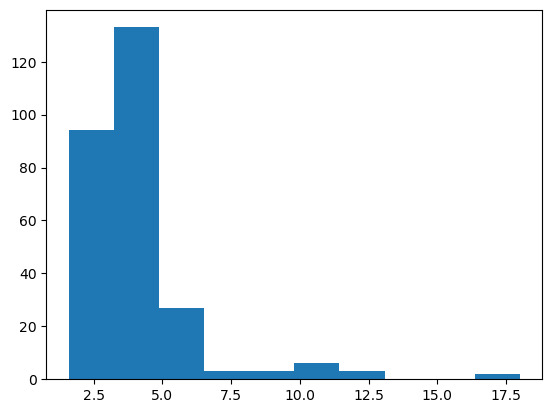

In [345]:
plt.hist(x = phev_consumption)

From the plot, it is evident that the distribution of PHEV is not normally distributed. So fill the empty rows with median.

In [342]:
np.median(mainData.loc[mainData['Powertrain']== 'Plug-in Hybrid Electric Vehicle (PHEV)']['Electric energy consumption Miles/kWh'])

nan

In [346]:
np.median(phev_consumption.dropna())

3.6

In [347]:
mainData.loc[mainData['Powertrain'] ==
             'Plug-in Hybrid Electric Vehicle (PHEV)',
             'Electric energy consumption Miles/kWh'] = 3.6

#### Battery Electric vehicle

(array([ 9.,  0., 13., 41., 10., 21., 20., 81.,  7.,  5.]),
 array([2.  , 2.28, 2.56, 2.84, 3.12, 3.4 , 3.68, 3.96, 4.24, 4.52, 4.8 ]),
 <BarContainer object of 10 artists>)

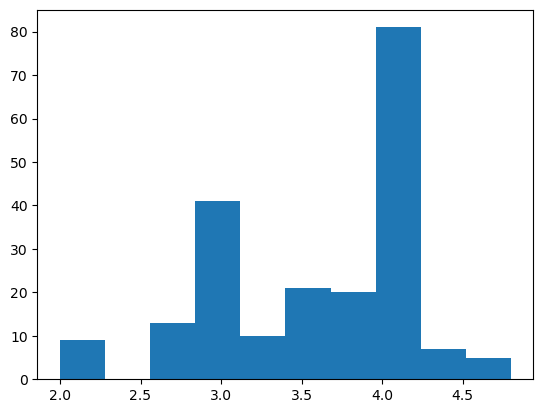

In [407]:
plt.hist(mainData.loc[mainData['Powertrain']==
                      'Battery Electric Vehicle (BEV) / Pure Electric Vehicle / Electric Vehicle (EV)','Electric energy consumption Miles/kWh'])

In [348]:
bev_consumption = mainData.loc[mainData['Powertrain'] == 'Battery Electric Vehicle (BEV) / Pure Electric Vehicle / Electric Vehicle (EV)',
            'Electric energy consumption Miles/kWh']

In [349]:
bev_consumption.isna().sum()

0

There is no null values for 'Electric energy consumption Miles/kWh' under 
Battery Electric Vehicle (BEV) / Pure Electric Vehicle / Electric Vehicle (EV) engines.

#### Hybrid Electric Vehicle

(array([  0.,   0.,   0.,   0.,   0., 540.,   0.,   0.,   0.,   0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

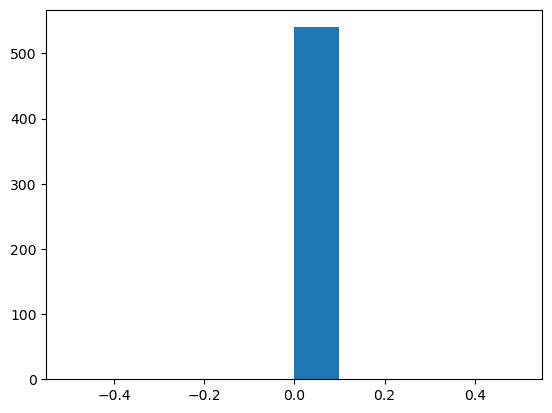

In [408]:
plt.hist(mainData.loc[mainData['Powertrain']==
                      'Hybrid Electric Vehicle (HEV)', 'Electric energy consumption Miles/kWh'])

In [350]:
hev_consumption = mainData.loc[mainData['Powertrain'] == 'Hybrid Electric Vehicle (HEV)', 'Electric energy consumption Miles/kWh']

In [351]:
hev_consumption.isna().sum()

2195

In [352]:
hev_consumption.unique()

array([nan,  0.])

The values in HEV consuotion is either 0 or null values. So fill the rows with 0.

In [353]:
mainData.loc[mainData['Powertrain'] ==
             'Hybrid Electric Vehicle (HEV)',
             'Electric energy consumption Miles/kWh'] = 0

####  Mild Hybrid Electric Vehicle

In [354]:
mhev_consumption = mainData.loc[mainData['Powertrain'] == 'Mild Hybrid Electric Vehicle (MHEV)']['Electric energy consumption Miles/kWh']

In [355]:
mhev_consumption.unique()

array([nan,  0.])

In [356]:
mainData.loc[mainData['Powertrain'] == 'Mild Hybrid Electric Vehicle (MHEV)', 'Electric energy consumption Miles/kWh'] = 0

#### Micro Hybrid

In [357]:
microHybrid_consumption = mainData.loc[mainData['Powertrain'] == 'Micro-hybrid']['Electric energy consumption Miles/kWh']

In [358]:
microHybrid_consumption.unique()

array([nan])

In [359]:
mainData = mainData[mainData['Electric energy consumption Miles/kWh'].notna()]

As we take everything in metric units, change the 'Electric energy consumption Miles/kWh'into km/kWh

In [361]:
mainData['Electric energy consumption Miles/kWh'] = mainData['Electric energy consumption Miles/kWh'] * 1.60

In [362]:
# change column name

mainData.rename(columns={'Electric energy consumption Miles/kWh': 'Electric energy consumption Km/kWh'}, inplace=True)

In [363]:
mainData.isna().sum()

Transmission                             0
Engine Capacity                          0
Fuel Type                                0
Powertrain                               0
Engine Power (PS)                        0
Euro Standard                            0
Diesel VED Supplement                    0
Electric energy consumption Km/kWh       0
WLTP Metric Low                         10
WLTP Metric Medium                      10
WLTP Metric High                        10
WLTP Metric Extra High                  10
WLTP Metric Combined                     6
WLTP Metric Combined (Weighted)       2450
WLTP CO2                                10
Year                                     0
dtype: int64

#### Metric Combined Weighted

Doing the same procedure as we did it for the Electric energy consumption Miles/kWh.

#### Internal combustion engine

In [364]:
mainData.loc[mainData['Powertrain'] == 'Internal Combustion Engine (ICE)', 'WLTP Metric Combined (Weighted)'] = 0

In [365]:
WLTP_metric_cols = ['WLTP Metric Low', 'WLTP Metric Medium', 'WLTP Metric High', 'WLTP Metric Extra High']

for each in WLTP_metric_cols:
    mainData = mainData[mainData[each].notna()]

In [366]:
mainData = mainData[mainData['WLTP Metric Combined (Weighted)'].notna()]

In [367]:
mainData = mainData[mainData['WLTP CO2'].notna()]

In [368]:
mainData.isna().sum()

Transmission                          0
Engine Capacity                       0
Fuel Type                             0
Powertrain                            0
Engine Power (PS)                     0
Euro Standard                         0
Diesel VED Supplement                 0
Electric energy consumption Km/kWh    0
WLTP Metric Low                       0
WLTP Metric Medium                    0
WLTP Metric High                      0
WLTP Metric Extra High                0
WLTP Metric Combined                  0
WLTP Metric Combined (Weighted)       0
WLTP CO2                              0
Year                                  0
dtype: int64

In [369]:
# change year to actual format

mainData['Year'] = pd.to_datetime(mainData['Year'], format='%Y').dt.year

In [370]:
mainData = mainData.reset_index(drop = True)

In [371]:
mainData.head()

,Transmission,Engine Capacity,Fuel Type,Powertrain,Engine Power (PS),Euro Standard,Diesel VED Supplement,Electric energy consumption Km/kWh,WLTP Metric Low,WLTP Metric Medium,WLTP Metric High,WLTP Metric Extra High,WLTP Metric Combined,WLTP Metric Combined (Weighted),WLTP CO2,Year
0,M5,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,Euro 6d,False,0.0,9.5,6.1,5.8,7.0,6.8,0.0,153.0,2021
1,M5,1368.0,Petrol,Internal Combustion Engine (ICE),165.0,Euro 6d-TEMP,False,0.0,10.6,7.1,6.6,8.0,7.7,0.0,171.0,2020
2,M5,1368.0,Petrol,Internal Combustion Engine (ICE),165.0,Euro 6d-TEMP,False,0.0,9.6,6.7,6.3,7.7,7.3,0.0,165.0,2020
3,M5,1368.0,Petrol,Internal Combustion Engine (ICE),180.0,Euro 6d-TEMP,False,0.0,10.8,7.1,6.4,8.1,7.7,0.0,171.0,2020
4,M5,1368.0,Petrol,Internal Combustion Engine (ICE),180.0,Euro 6d-TEMP,False,0.0,10.8,7.1,6.4,8.1,7.7,0.0,171.0,2020


#### Taking Unique Values of Categorical variables

In [372]:
mainData['Transmission'].unique()

array(['M5', 'SAT5', 'SA5', 'M6', 'A8', 'A6', 'SA6', 'A7', 'M7', 'A9-AWD',
       '8AT', 'A9', 'DCT6', 'SAT6', 'CVT', 'SA7', 'SA8', 'A5', 'DCT7',
       'A1', '10 Speed Automatic', 'A8-AWD', '7DCT', 'A6-AWD', 'M6-AWD',
       'MPS6', 'MPS6-AWD', '8-speed', '6MT', '5MT', 'DCT8', '6AT', 'MT5',
       'AMT5', '4AT', 'MT6', '6-speed auto DCT', 'A4', 'AT6', 'AT1',
       'E-CVT', 'A10', 'Auto', '7SP. SSG', 'AT', '8A AWD', 'Manual',
       'Automatic', '8A-AWD', '7A-FWD'], dtype=object)

In [373]:
mainData['Fuel Type'].unique()

array(['Petrol', 'Diesel', 'Electricity / Petrol', 'Petrol / LPG',
       'Petrol Electric', 'Diesel Electric', 'Electricity',
       'Electricity / Diesel'], dtype=object)

In [374]:
mainData['Powertrain'].unique()

array(['Internal Combustion Engine (ICE)',
       'Plug-in Hybrid Electric Vehicle (PHEV)',
       'Hybrid Electric Vehicle (HEV)',
       'Mild Hybrid Electric Vehicle (MHEV)',
       'Battery Electric Vehicle (BEV) / Pure Electric Vehicle / Electric Vehicle (EV)'],
      dtype=object)

In [375]:
mainData['Euro Standard'].unique()

array(['Euro 6d', 'Euro 6d-TEMP', 'Euro 6c',
       'Euro 6-WLTP (for BEVs only)'], dtype=object)

In [376]:
mainData['Diesel VED Supplement'].unique()

array([False, True], dtype=object)


## DATA VISUALISATION

### Check the outliers in the pre-processed data (Boxplot)

In [412]:
# number of numerical columns in the dataset

numerical_columns = mainData.select_dtypes(include=['int64', 'float64'])
len(numerical_columns.columns)

11

In [413]:
numerical_columns = numerical_columns.drop(columns = ['Engine Capacity','Year'])

In [414]:
numerical_columns.head()

,Engine Power (PS),Electric energy consumption Miles/kWh,WLTP Metric Low,WLTP Metric Medium,WLTP Metric High,WLTP Metric Extra High,WLTP Metric Combined,WLTP Metric Combined (Weighted),WLTP CO2
0,145.0,NaN,9.5,6.1,5.8,7.0,6.8,NaN,153.0
1,165.0,NaN,10.6,7.1,6.6,8.0,7.7,0.0,171.0
2,165.0,NaN,9.6,6.7,6.3,7.7,7.3,0.0,165.0
3,180.0,NaN,10.8,7.1,6.4,8.1,7.7,0.0,171.0
4,180.0,NaN,10.8,7.1,6.4,8.1,7.7,0.0,171.0


In [415]:
len(numerical_columns.columns)

9

In [416]:
mainData.items()

<generator object DataFrame.items at 0x7fe5b1afd350>

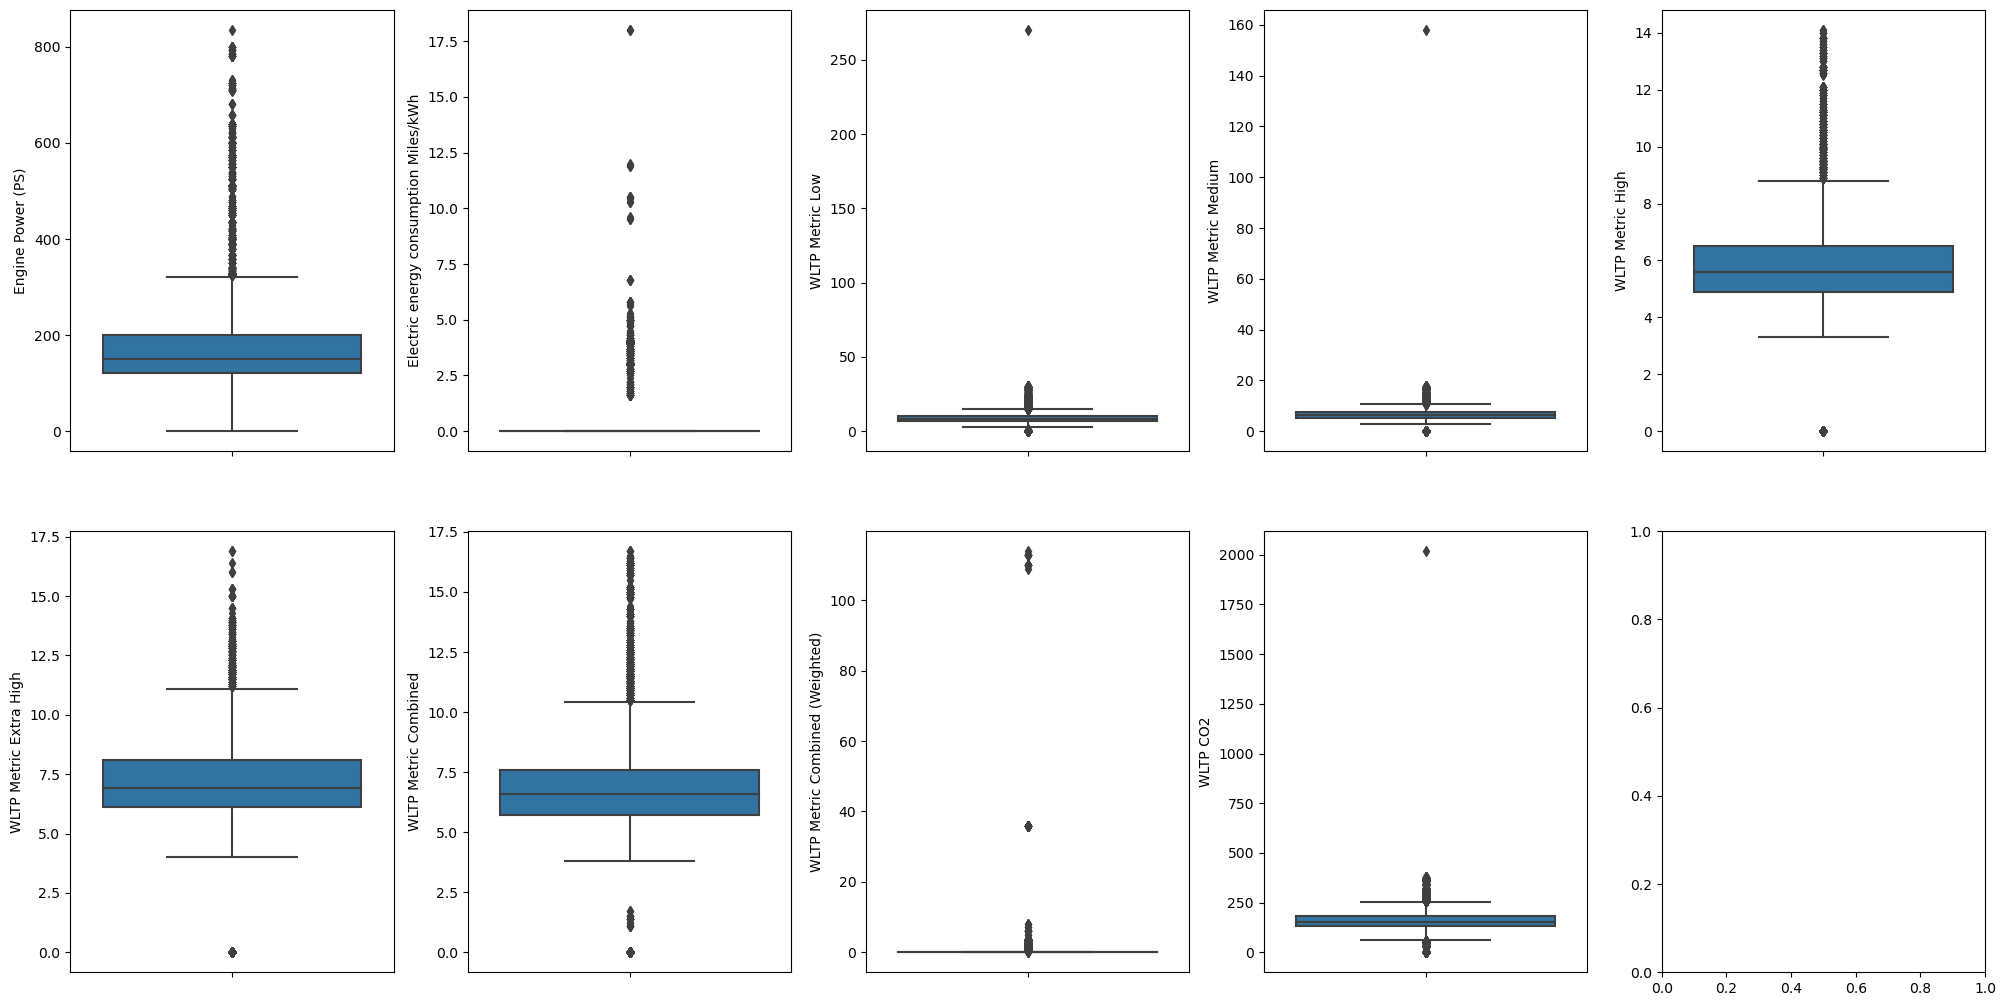

In [417]:
fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in numerical_columns.items():
    sns.boxplot(y=col, data=mainData, ax=ax[index])
    index += 1
    
    
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

Analysing the boxplots, outliers to be removed are only found in WLTP Metric Low, WLTP Metric Medium and WLTP CO2. The observed outliers in the boxplot of other variables are not impossible values so it is not removed. 

In [418]:
# remove the outlier in target variable
mainData = mainData[mainData['WLTP CO2'] < 2000]

In [419]:
# remove outliers in WLTP Metric low
mainData = mainData[mainData['WLTP Metric Low'] < 100]
mainData = mainData[mainData['WLTP Metric Low'] > 0]

In [420]:
# remove outliers in WLTP Metric medium
mainData = mainData[(mainData['WLTP Metric Medium'] < 60)]
mainData = mainData[mainData['WLTP Metric Low'] > 0]

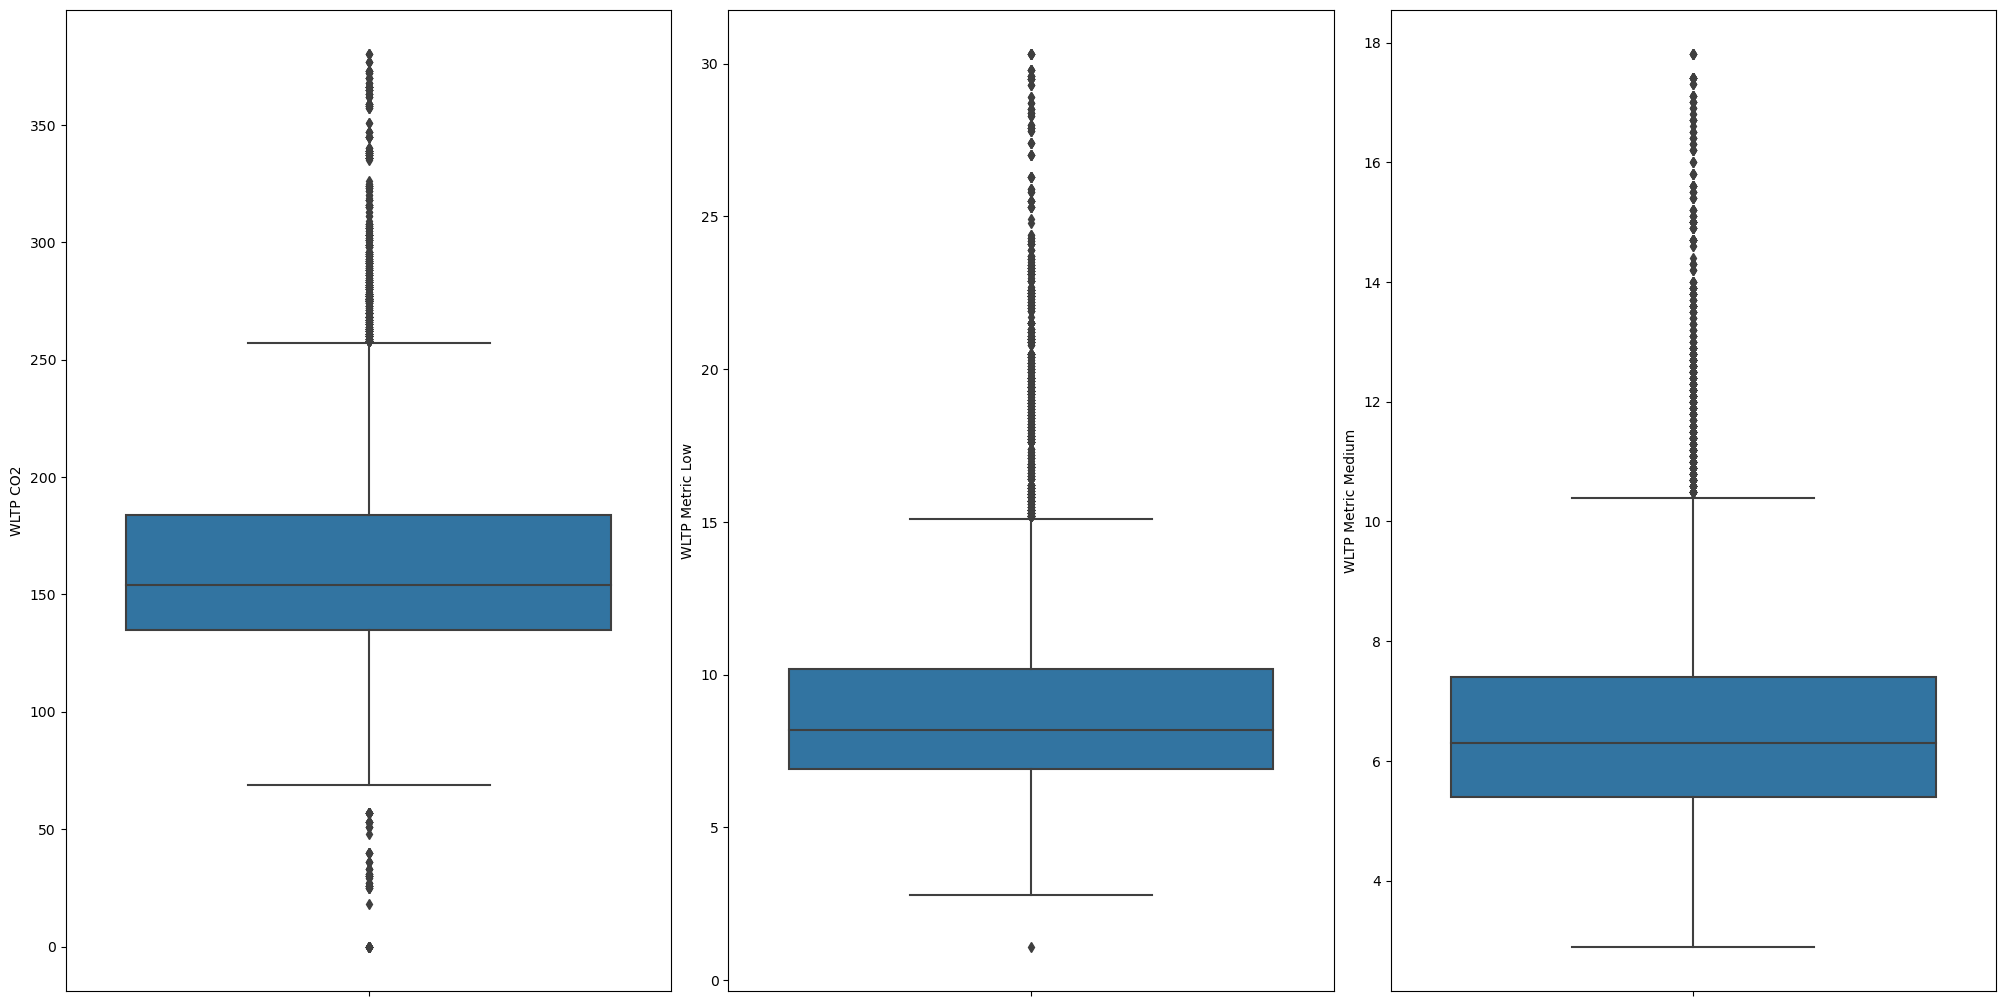

In [421]:
# plot the boxplot for the above variables

columns = mainData[['WLTP CO2','WLTP Metric Low','WLTP Metric Medium']]

fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in columns.items():
    sns.boxplot(y=col, data=mainData, ax=ax[index])
    index += 1
    
    
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

### Histogram of the target variable

(array([  60.,   43.,  730., 6220., 5181., 1691.,  858.,  445.,  116.,
          89.]),
 array([  0.,  38.,  76., 114., 152., 190., 228., 266., 304., 342., 380.]),
 <BarContainer object of 10 artists>)

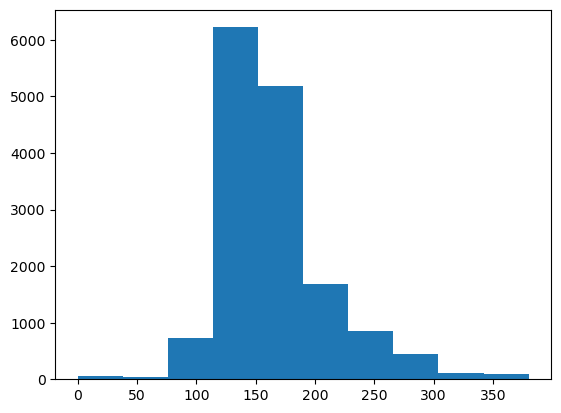

In [422]:
# plot the WLTPCO2
plt.hist(mainData['WLTP CO2'])

Histogram of the target variabel can be used to analyse the the distribution of the target variable. From the histogram it is seen that the target variable [WLTP COP 2] is normally distributed.

### Histogram plot of the numerical variables

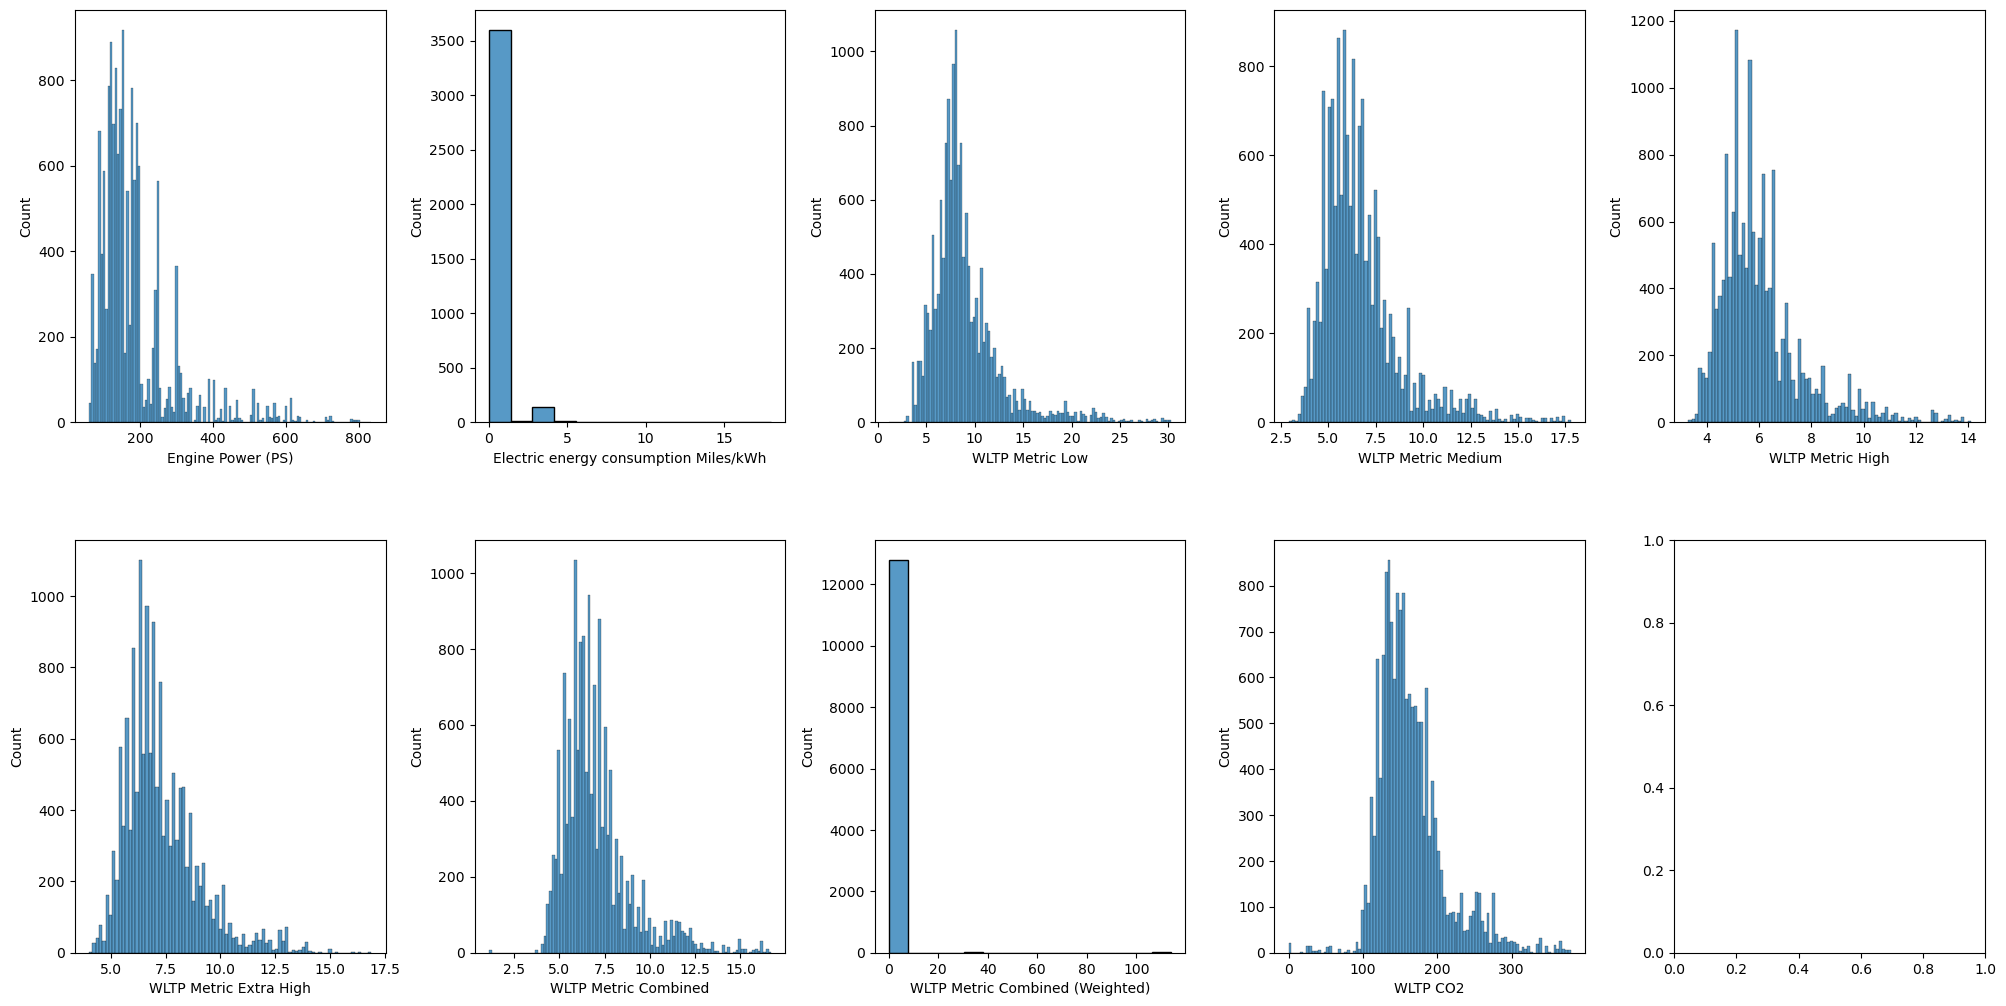

In [423]:
# check the distribution of the numerical variables
figure, axis = plt.subplots(ncols=5, nrows=2, figsize=(20, 10))
index = 0
axis = axis.flatten()

for col, value in numerical_columns.items():
    sns.histplot(x=col, data=mainData, ax=axis[index])
    index += 1
    
    
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

### Create heatmap to check the correlation

<Axes: >

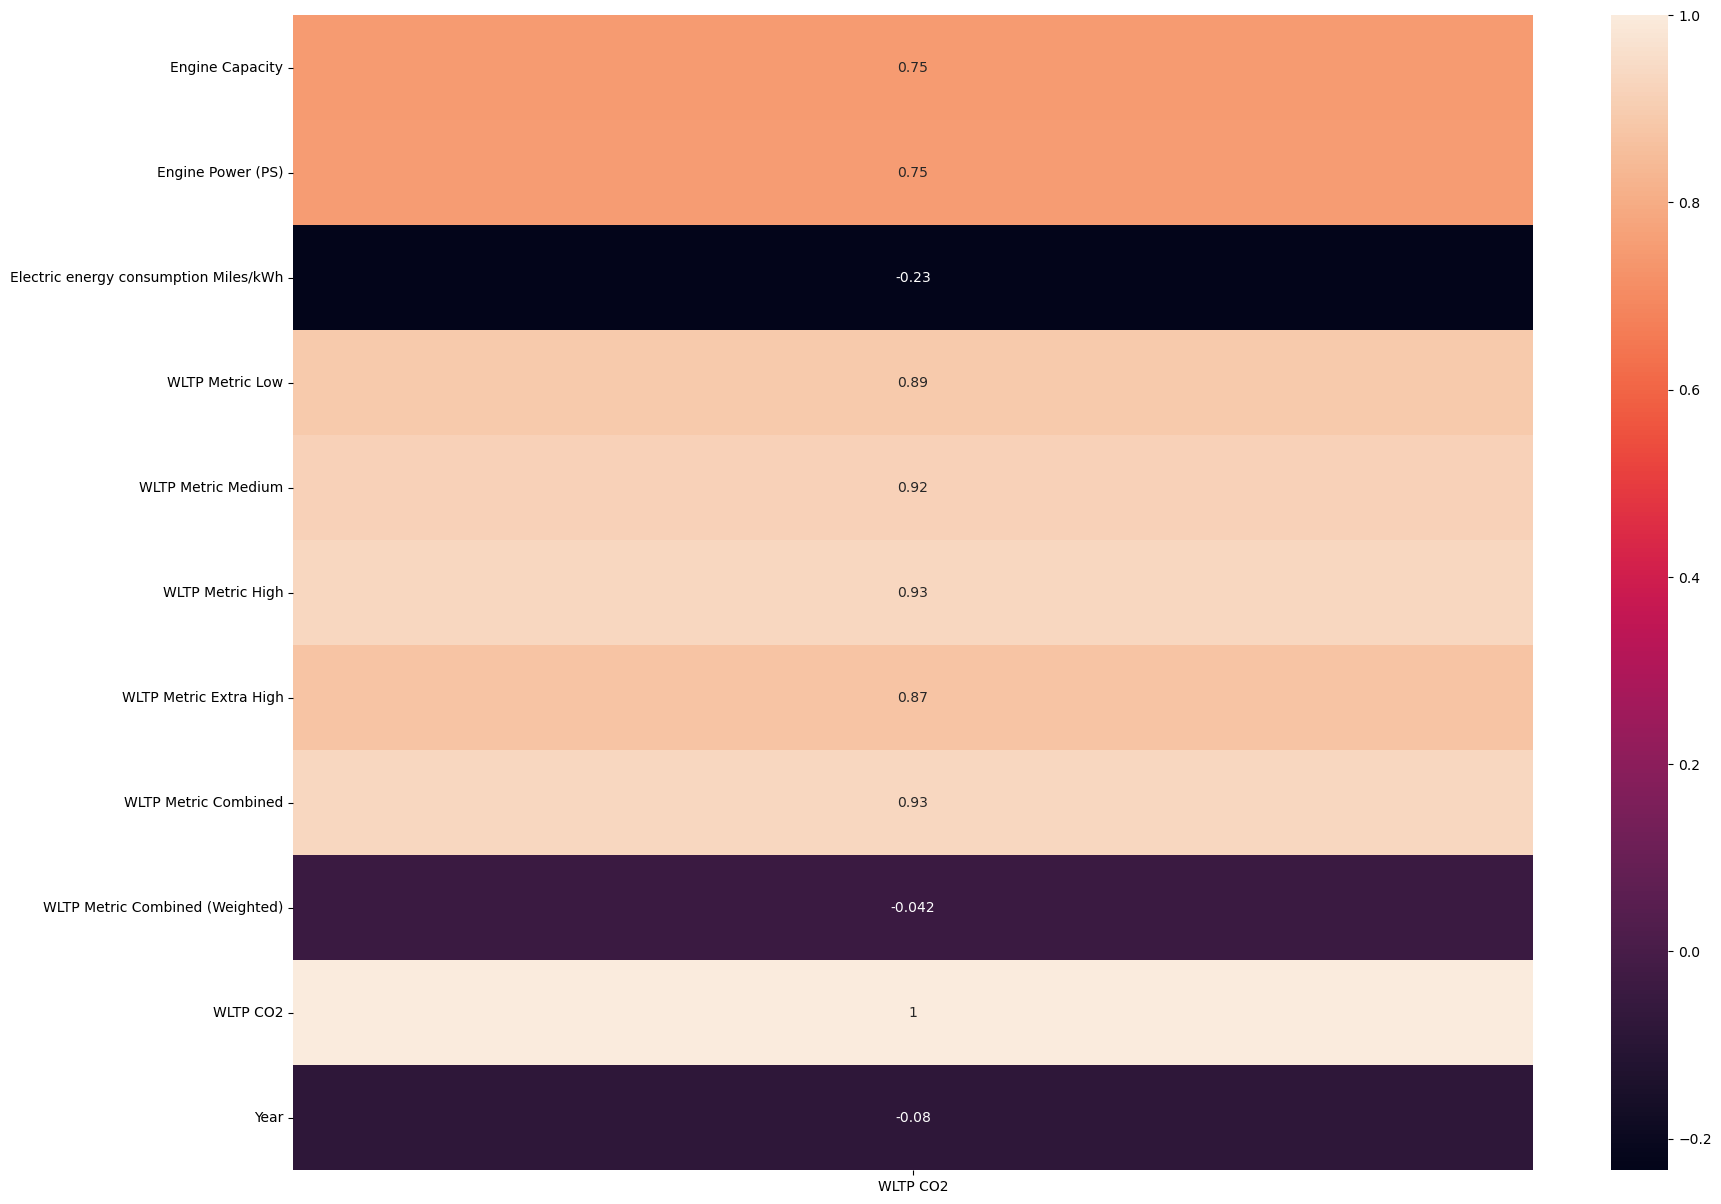

In [424]:
# plotting the heatmap
plt.figure(figsize = (20,15))
corr_matrix = mainData.corr()
sns.heatmap(corr_matrix[["WLTP CO2"]], annot=True)

From the heatmap showing the correlation between the target variable and the all other numerical variables, it is found that WLTP Metric low, WLTP Metric Medium, WLTP metric High, WLTP Metric Combined have more correlation with the target variable. 

### Scatter Plot to analyse the relation between the output variable and the other varibles

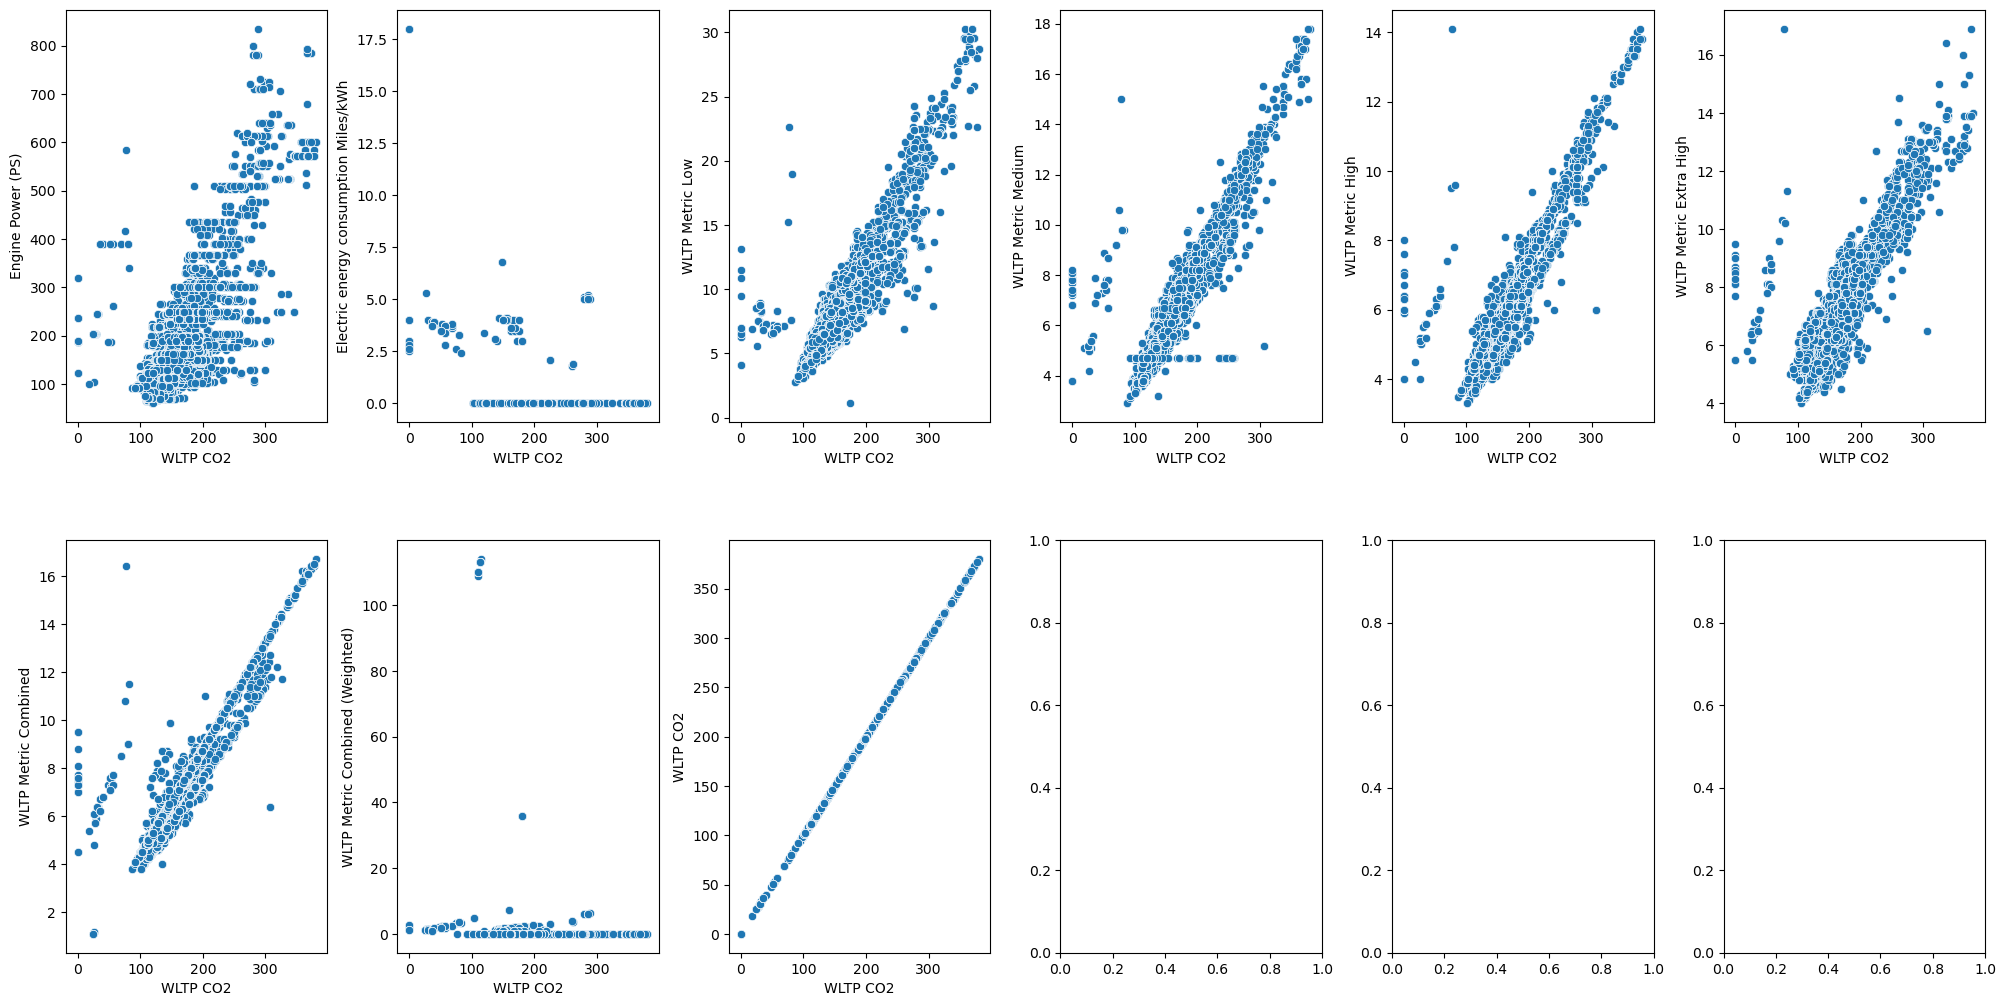

In [425]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in numerical_columns.items():
    sns.scatterplot(x=mainData['WLTP CO2'], y=col, data=mainData, ax=ax[index])
    index += 1
    
    
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

### Creating Dummy Variables

Creating dummy variables as there is categorical variables as input variable

In [68]:
mainData_dummies = pd.get_dummies(mainData, columns=['Engine Capacity','Transmission', 'Fuel Type', 'Powertrain', 'Euro Standard',
       'Diesel VED Supplement', 'Year'], drop_first= True)Creating dummy variables as there is categorical variables as input variable

In [70]:
mainData_dummies.head()

,Engine Power (PS),Electric energy consumption Km/kWh,WLTP Metric Low,WLTP Metric Medium,WLTP Metric High,WLTP Metric Extra High,WLTP Metric Combined,WLTP Metric Combined (Weighted),WLTP CO2,Engine Capacity_875.0,...,Powertrain_Hybrid Electric Vehicle (HEV),Powertrain_Internal Combustion Engine (ICE),Powertrain_Mild Hybrid Electric Vehicle (MHEV),Powertrain_Plug-in Hybrid Electric Vehicle (PHEV),Euro Standard_Euro 6c,Euro Standard_Euro 6d,Euro Standard_Euro 6d-TEMP,Diesel VED Supplement_True,Year_2021,Year_2022
0,145.0,0.0,9.5,6.1,5.8,7.0,6.8,0.0,153.0,0,...,0,1,0,0,0,1,0,0,1,0
1,165.0,0.0,10.6,7.1,6.6,8.0,7.7,0.0,171.0,0,...,0,1,0,0,0,0,1,0,0,0
2,165.0,0.0,9.6,6.7,6.3,7.7,7.3,0.0,165.0,0,...,0,1,0,0,0,0,1,0,0,0
3,180.0,0.0,10.8,7.1,6.4,8.1,7.7,0.0,171.0,0,...,0,1,0,0,0,0,1,0,0,0
4,180.0,0.0,10.8,7.1,6.4,8.1,7.7,0.0,171.0,0,...,0,1,0,0,0,0,1,0,0,0


### Train test split

In [71]:
X = mainData_dummies.drop(columns = ['WLTP CO2'])
y = mainData_dummies['WLTP CO2']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

Seperate dataset into numerical and categorical.

In [73]:
train_numerical = X_train[['Engine Power (PS)', 'Electric energy consumption Km/kWh',
                           'WLTP Metric Low', 'WLTP Metric Medium', 'WLTP Metric High', 'WLTP Metric Extra High',
                          'WLTP Metric Combined', 'WLTP Metric Combined (Weighted)']]
Seperate dataset into numerical and categorical.
test_numerical = X_test[['Engine Power (PS)', 'Electric energy consumption Km/kWh',
                           'WLTP Metric Low', 'WLTP Metric Medium', 'WLTP Metric High', 'WLTP Metric Extra High',
                          'WLTP Metric Combined', 'WLTP Metric Combined (Weighted)']]

In [74]:
train_categorical = X_train.drop(columns = ['Engine Power (PS)', 'Electric energy consumption Km/kWh',
                           'WLTP Metric Low', 'WLTP Metric Medium', 'WLTP Metric High', 'WLTP Metric Extra High',
                          'WLTP Metric Combined', 'WLTP Metric Combined (Weighted)'])
test_categorical = X_test.drop(columns = ['Engine Power (PS)', 'Electric energy consumption Km/kWh',
                           'WLTP Metric Low', 'WLTP Metric Medium', 'WLTP Metric High', 'WLTP Metric Extra High',
                          'WLTP Metric Combined', 'WLTP Metric Combined (Weighted)'])

### Standardise dataset

#### Check the Variance of numerical variables

In [67]:
mainData.var()

Engine Capacity                       695711.176588
Engine Power (PS)                      11753.458178
Diesel VED Supplement                      0.178813
Electric energy consumption Km/kWh         0.832623
WLTP Metric Low                           19.961424
WLTP Metric Medium                         6.696604
WLTP Metric High                           3.242815
WLTP Metric Extra High                     3.690507
WLTP Metric Combined                       4.565066
WLTP Metric Combined (Weighted)            0.167175
WLTP CO2                                2481.617555
Year                                       0.583713
dtype: float64

In [75]:
train_numerical = train_numerical.reset_index(drop = True)
train_categorical = train_categorical.reset_index(drop = True)
test_numerical = test_numerical.reset_index(drop = True)
test_categorical = test_categorical.reset_index(drop = True)

In [76]:
scaler = StandardScaler()

# fit transform
train_scaled = scaler.fit_transform(train_numerical)
test_scaled = scaler.transform(test_numerical)

In [77]:
train_labelled = pd.DataFrame(train_scaled, columns = ['Engine Power (PS)','Electric energy consumption Km/kWh',
                           'WLTP Metric Low', 'WLTP Metric Medium', 'WLTP Metric High', 'WLTP Metric Extra High',
                          'WLTP Metric Combined', 'WLTP Metric Combined (Weighted)'])
test_labelled = pd.DataFrame(test_scaled, columns = ['Engine Power (PS)', 'Electric energy consumption Km/kWh',
                           'WLTP Metric Low', 'WLTP Metric Medium', 'WLTP Metric High', 'WLTP Metric Extra High',
                          'WLTP Metric Combined', 'WLTP Metric Combined (Weighted)'])

In [78]:
X_train_new = pd.concat([train_labelled, train_categorical], axis = 1)

In [79]:
X_test_new = pd.concat([test_labelled, test_categorical], axis = 1)

##### The dataset before pre-processing had 16148 rows and 46 columns. After pre-processing there are  16 columns and 14333 rows.The columns which are having 80% - 90% null values is omitted and the others are filled accordingly. The outliers to be removed are removed.The target variable is 'WLTP CO2'.The target variable is continuos and variables are correlated.Regression models can be done.However here we chose to do the classification models as the emission CO2 is being categorized into different categories in real world according to their values.Data is visualised and analysed.Dummy varibles is created for the categorical data.The data is divided in train data and test data in 70:30 ratio.After checking the variance, the data is standadised.

## METHOD 1 - SUPPORT VECTOR MACHINE CLASSIFIER

From the data visualisation above, it is seen that the target variable is normally distributed.So mean is considered to divide the target variable into binary classes.

In [80]:
svc_threshold = np.mean(mainData['WLTP CO2'])

In [81]:
y_train_class = []
y_test_class = []

for each in y_train:
    if each > svc_threshold:
        y_train_class.append("High")
    else:
        y_train_class.append("Low")

for each in y_test:
    if each > svc_threshold:
        y_test_class.append("High")
    else:
        y_test_class.append("Low")

In [82]:
SVC_model_tuning = SVC()

In [83]:
param_grid_SVC = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel types
    'gamma': [0.001, 0.01, 0.1, 1]  # Kernel coefficient (for 'linear', 'rbf' and 'poly' kernels)
}

Grid-search is the hyperparameter technique used in this to search and select the best parameter for teh best performance of the model.This technique can avoid the manual trial and error which can leads to improved model performance and the generalisation of the data.

In [85]:
grid_search_SVC.fit(X_train_new, y_train_class)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf', 'poly']})

In [86]:
best_params_SVC = grid_search_SVC.best_params_
best_params_SVC

{'C': 1, 'gamma': 1, 'kernel': 'poly'}

The polynomial kernel is identified as the best kernel with regularisation parameter = 1 with gamma value as 1

In [87]:
# create the model with the selected hyperparamters
poly_SVC_model = SVC(C = 1, gamma = 1, kernel = 'poly')

In [88]:
# fit the model
poly_SVC_model.fit(X_train_new, y_train_class)

SVC(C=1, gamma=1, kernel='poly')

In [89]:
# preidct the model
y_pred_train = poly_SVC_model.predict(X_train_new)

In [90]:
# create the confusion matrix
confusion_matrix(y_train_class, y_pred_train)

array([[4846,   23],
       [  20, 5144]])

The false negative and false positive rate is really low which implies that the the model is accurate.

In [91]:
accuracy_SVC_train_1 = accuracy_score(y_train_class, y_pred_train)*100
accuracy_SVC_train_1

99.57141433270208

In [92]:
y_pred_test = poly_SVC_model.predict(X_test_new)

In [93]:
accuracy_SVC_test_1 = accuracy_score(y_test_class, y_pred_test)*100
accuracy_SVC_test_1

98.95348837209302

#### Without  dummy 

SVM classifier is amde without the dummy variabless. The steps are similiar to what we did earlier.

In [94]:
SVC_model_tuning_2 = SVC()

In [95]:
param_grid_SVC_2 = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'], 
    'gamma': [0.001, 0.01, 0.1, 1] 
}

In [96]:
grid_search_SVC_2 = GridSearchCV(SVC_model_tuning_2, param_grid = param_grid_SVC_2, cv = 5)

In [97]:
grid_search_SVC_2.fit(train_labelled, y_train_class)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf', 'poly']})

In [98]:
best_params_SVC_2 = grid_search_SVC_2.best_params_
best_params_SVC_2

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}

In [99]:
poly_SVC_model_2 = SVC(C = 100, gamma = 1, kernel = 'rbf')

In [100]:
poly_SVC_model_2.fit(train_labelled, y_train_class)

SVC(C=100, gamma=1)

In [101]:
y_pred_train_2 = poly_SVC_model_2.predict(train_labelled)

In [102]:
confusion_matrix(y_train_class, y_pred_train_2)

array([[4687,  182],
       [ 109, 5055]])

Comparing the confusion matrix to confusion matrix of the previos model, the false negative and false positive rate is a bit high which implies that the accuracy rate will be a bit low than the previous one.

In [103]:
accuracy_SVC_train_2 = accuracy_score(y_train_class, y_pred_train_2)*100
accuracy_SVC_train_2

97.0995714143327

In [104]:
y_pred_test_2 = poly_SVC_model_2.predict(test_labelled)

In [105]:
accuracy_SVC_test_2 = accuracy_score(y_test_class, y_pred_test_2)*100
accuracy_SVC_test_2

96.83720930232558

The accuracy is low comparing to the polynomial kernel.

#### One feature

Considering the correlation plot,try building the model and find accuracy based on the highest correlated variable to the target variable

In [106]:
SVC_model_tuning_3 = SVC()

In [107]:
param_grid_SVC_3 = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel types
    'gamma': [0.001, 0.01, 0.1, 1]  # Kernel coefficient (for 'rbf' and 'poly' kernels)
}

In [108]:
grid_search_SVC_3 = GridSearchCV(SVC_model_tuning_3, param_grid = param_grid_SVC_3, cv = 5)

In [109]:
grid_search_SVC_3.fit(X_train_new[["WLTP Metric High"]], y_train_class)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf', 'poly']})

In [110]:
best_params_SVC_3 = grid_search_SVC_3.best_params_
best_params_SVC_3

{'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}

In [111]:
linear_SVC_model_3 = SVC(C = 0.1, gamma = 0.001, kernel = 'linear')

In [112]:
linear_SVC_model_3.fit(X_train_new[["WLTP Metric High"]], y_train_class)

SVC(C=0.1, gamma=0.001, kernel='linear')

In [113]:
y_pred_train_3 = poly_SVC_model_3.predict(X_train_new[["WLTP Metric High"]])

In [114]:
confusion_matrix(y_train_class, y_pred_train_3)

array([[4240,  629],
       [ 349, 4815]])

In [115]:
accuracy_SVC_train_3 = accuracy_score(y_train_class, y_pred_train_3)*100
accuracy_SVC_train_3

90.25216784610784

In [116]:
y_pred_test_3 = linear_SVC_model_3.predict(X_test_new[["WLTP Metric High"]])

In [117]:
accuracy_SVC_test_3 = accuracy_score(y_test_class, y_pred_test_3)*100
accuracy_SVC_test_3

90.34883720930232

#### Two features

In [119]:
SVC_model_tuning_4 = SVC()

In [120]:
param_grid_SVC_4 = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel types
    'gamma': [0.001, 0.01, 0.1, 1]  # Kernel coefficient (for 'rbf' and 'poly' kernels)
}

In [121]:
grid_search_SVC_4 = GridSearchCV(SVC_model_tuning_4, param_grid = param_grid_SVC_4, cv = 5)

In [122]:
grid_search_SVC_4.fit(X_train_new[['WLTP Metric High', 'WLTP Metric Combined']], y_train_class)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf', 'poly']})

In [123]:
best_params_SVC_4 = grid_search_SVC_4.best_params_
best_params_SVC_4

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}

In [124]:
poly_SVC_model_4 = SVC(C = 100, gamma = 1, kernel = 'rbf')

In [125]:
poly_SVC_model_4.fit(X_train_new[['WLTP Metric High', 'WLTP Metric Combined']], y_train_class)

SVC(C=100, gamma=1)

In [126]:
y_pred_train_4 = poly_SVC_model_4.predict(X_train_new[['WLTP Metric High', 'WLTP Metric Combined']])

In [127]:
confusion_matrix(y_train_class, y_pred_train_4)

array([[4262,  607],
       [ 226, 4938]])

In [128]:
accuracy_SVC_train_4 = accuracy_score(y_train_class, y_pred_train_4)*100
accuracy_SVC_train_4

91.69739858467058

In [129]:
y_pred_test_4 = poly_SVC_model_4.predict(X_test_new[['WLTP Metric High', 'WLTP Metric Combined']])

In [130]:
accuracy_SVC_test_4 = accuracy_score(y_test_class, y_pred_test_4)*100
accuracy_SVC_test_4

91.90697674418604

#### PLot

In [131]:
test_SVC_accuracies = [accuracy_SVC_test_1, accuracy_SVC_test_2, accuracy_SVC_test_3, accuracy_SVC_test_4]
features = ["All features", "Without Dummy", 1, 2]

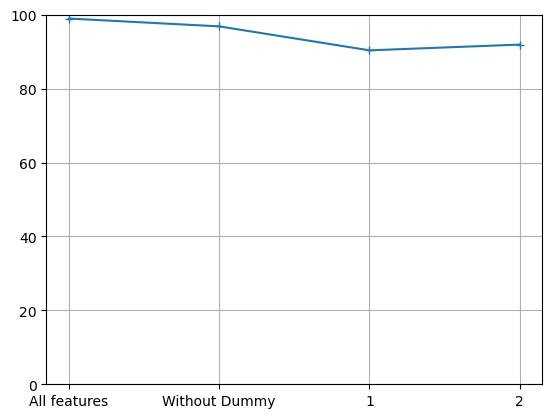

In [132]:
max_val = max(test_SVC_accuracies)
max_index = test_SVC_accuracies.index(max_val)

plt.plot(features, test_SVC_accuracies, "-+")
plt.grid(True)
plt.ylim(0,100)
plt.show()

In [133]:
train_SVC_accuracies = [accuracy_SVC_train_1, accuracy_SVC_train_2, accuracy_SVC_train_3, accuracy_SVC_train_4]
features = ["All features", "Without Dummy", 1, 2]

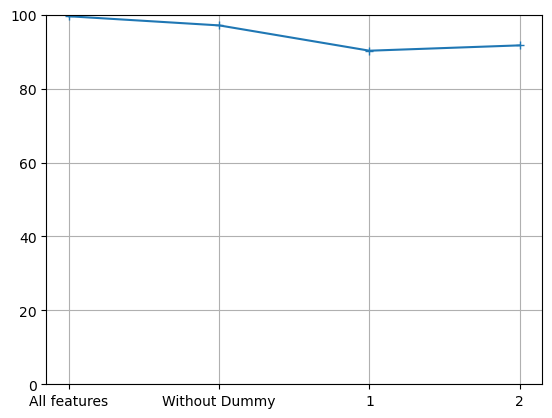

In [134]:
max_val = max(train_SVC_accuracies)
max_index = train_SVC_accuracies.index(max_val)

plt.plot(features, train_SVC_accuracies, "-+")
plt.grid(True)
plt.ylim(0,100)
plt.show()

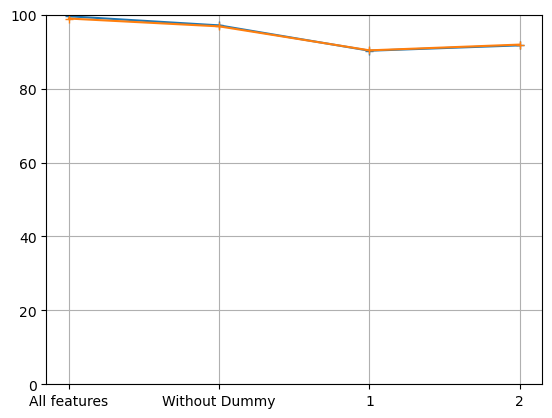

In [135]:
plt.plot(features, train_SVC_accuracies, "-+")
plt.plot(features, test_SVC_accuracies, "-+")
plt.grid(True)
plt.ylim(0,100)
plt.show()

The SVM classifier, after analysing different models with different hyperparameters, it is seen that the model with all features has high accuracy comparing to the other models.Also, the misclassification rate is also very low for all feature model.
but, when the feature number is reduced, we cannot see a significant reduction in accuracy score. One feature model has nearly 90% accuracy and increasing feature only improves the accuracy very little.

Therefore, the best model can be selected as the linear SVC model  with only one feature as it is able to predict 90% of the values correctly.
Model parameters are,

C = 0.1

gamma = 0.001

kernel = linear

## METHOD 2 - NEURAL NETWORKS

First, we have to encode the test and train target variable data to 0 and 1. The code below does it

In [136]:
# assign number of rows and features
n_samples, n_features = train_labelled.shape

In [137]:
y_train_binary = []
y_test_binary = []

for each in y_train:
    if each > svc_threshold:
        y_train_binary.append(1)
    else:
        y_train_binary.append(0)

for each in y_test:
    if each > svc_threshold:
        y_test_binary.append(1)
    else:
        y_test_binary.append(0)

The torch library only works for float 32 Datatypes. so we have to convert train, test datasets.

In [139]:
X_train_neural = train_labelled.to_numpy(dtype = 'float32')
X_test_neural = test_labelled.to_numpy(dtype = 'float32')

In [140]:
X_train_neural = torch.from_numpy(X_train_neural)
X_test_neural = torch.from_numpy(X_test_neural)

In [141]:
y_train_class_arr = np.array(y_train_binary)
y_test_class_arr = np.array(y_test_binary)

In [142]:
y_train_neural = torch.from_numpy(y_train_class_arr.astype(np.float32))
y_test_neural = torch.from_numpy(y_test_class_arr.astype(np.float32))

In [143]:
y_train_neural = y_train_neural.view(y_train_neural.shape[0], 1)
y_test_neural = y_test_neural.view(y_test_neural.shape[0], 1)

The code below defines a logistic regression model as a PyTorch neural network module, with a single linear layer that takes "n_input_features" input features and produces a single output.

In the "forward" method, it computes the sigmoid of the linear transformation of the input data "x," which shows the prob of the binary classification output.

Here the activation function is sigmoid

In [144]:
class LogisticRegression(nn.Module):
    
    def __init__(self, n_input_features):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)
        
    def forward(self, x):
        y_predicted = torch.sigmoid(self.linear(x))
        return y_predicted

In [145]:
# instantiate a LogisticRegression model
model = LogisticRegression(n_features)

The code below creates a function called "loss_function" which takes learning rate values and calculates accuracies of model withn each learning rates.

In [146]:
accuracies = []
def loss_function(learning_rate):
    
    criterion = nn.BCELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
    
    # training loop
    
    num_epochs = 20000
    for epoch in range(num_epochs):
        
        # forward pass and loss
        y_predicted = model(X_train_neural)
        loss = criterion(y_predicted, y_train_neural)
        
        #Backward pass
        loss.backward()
        
        #updates
        optimizer.step()
        
        #zero gradients
        optimizer.zero_grad()
        
        if (epoch + 1) % 10 == 0:
            with torch.no_grad():
                y_predicted = model(X_test_neural)
                y_predicted_cls = y_predicted.round()
                acc = y_predicted_cls.eq(y_test_neural).sum() / float(y_test_neural.shape[0])
                print(f'accuracy = {acc:.4f}')
            return acc.item()

Accuracy of each model is shown below

In [147]:
acc1 = round(loss_function(0.01)*100, 2)
acc2 = round(loss_function(1)*100, 2)
acc3 = round(loss_function(5)*100, 2)
acc4 = round(loss_function(10)*100, 2)

accuracy = 0.3081
accuracy = 0.9102
accuracy = 0.9237
accuracy = 0.9167


Learning rate and accuracies are plotted as line plot

In [148]:
learning_rate = [0.01, 1, 5, 10]
accuracies = [acc1, acc2, acc3, acc4]

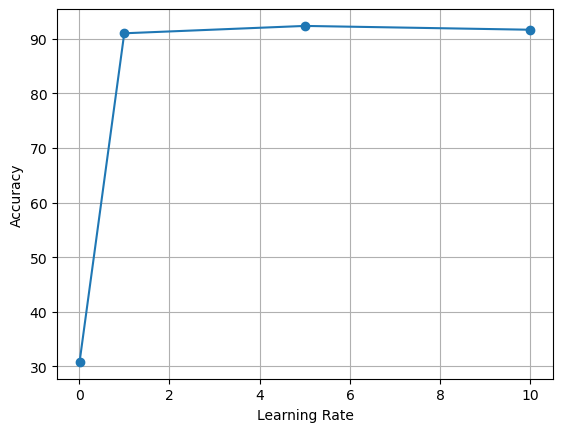

In [213]:
plt.plot(learning_rate, accuracies, "-o")
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.grid(True)
plt.plot()
plt.show()

From the above plot, we can see that the accuracy for first model with learning rate 0.01 is 30 %.

For learning rate = 1, it exponentially increases to 91%. For each learning rate value after that, the change is not sigificantly high.
Therefore, the model with learning rate 1 is the best model out of 4

## METHOD 3 - Naive Bayes

#### With Dummy Variables

As per the WLTP test, WLTP CO2 emissions are divided into categories depending on the hazardous nature of it.Here the target variable, WLTP CO2 emissions, its divided into three classess referring to the what discussed earlier.

#### With Dummy Variables

In [150]:
# create bins to classify the target variable into classes

bins = [-1, 100, 170, int(np.max(mainData['WLTP CO2']))]
labels = ['Low', 'Moderate', 'High']

In [151]:
# classify the y_train and y_test values according to bins and labels
y_train_multi = pd.cut(y_train, bins = bins, labels = labels)
y_test_multi = pd.cut(y_test, bins = bins, labels = labels)

In [152]:
# create the model
naive_model = GaussianNB()

In [153]:
# fit the model
naive_model.fit(X_train_new, y_train_multi)

GaussianNB()

In [154]:
# predict the target variable on train data
y_pred_1_train = naive_model.predict(X_train_new)

In [155]:
# find the accuaracy on the train data
accuracy_1_train = accuracy_score(y_train_multi, y_pred_1_train)*100
accuracy_1_train

70.16844413435662

In [156]:
# predict the target variable on test data
y_pred_1_test = naive_model.predict(X_test_new)

In [157]:
# find the accuracy on test data
accuracy_1_test = accuracy_score(y_test_multi, y_pred_1_test)*100
accuracy_1_test

69.46511627906978

#### Without dummy variables

Repeating the same steps as above, but the dataset without dummies.

In [159]:
X_train_naive = train_labelled
X_test_naive = test_labelled

In [160]:
tempData = mainData[['Engine Power (PS)', 'Electric energy consumption Km/kWh',
          'WLTP Metric Low', 'WLTP Metric Medium', 'WLTP Metric High', 'WLTP Metric Extra High',
          'WLTP Metric Combined', 'WLTP Metric Combined (Weighted)', 'WLTP CO2']]

In [161]:
naive_model_2 = GaussianNB()

In [162]:
naive_model_2.fit(X_train_naive, y_train_multi)

GaussianNB()

In [163]:
y_pred_2_train = naive_model_2.predict(train_labelled)

In [164]:
accuracy_2_train = accuracy_score(y_train_multi, y_pred_2_train)*100
accuracy_2_train

89.80364796172631

In [165]:
y_pred_2_test = naive_model_2.predict(test_labelled)

In [166]:
accuracy_2_test =  accuracy_score(y_test_multi, y_pred_2_test)*100
accuracy_2_test

88.76744186046511

After building the without using the dummies, the accuracy rate is seen higher than the model with dummy variables.

#### Considering the  correlation 

<Axes: >

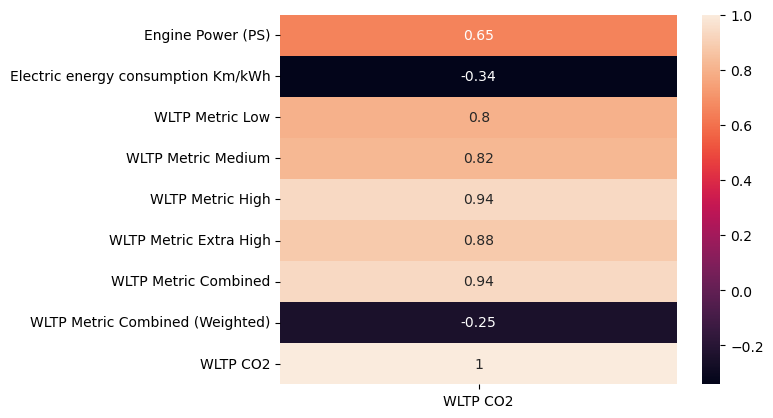

In [227]:
# correlation matrix
corr_matrix = tempData.corr()
sns.heatmap(corr_matrix[['WLTP CO2']], annot = True)

Here, try building the model and find accuracy based on the highest correlated variable to the target variable

In [167]:
naive_model_3 = GaussianNB()

In [168]:
naive_model_3.fit(X_train_naive[['WLTP Metric High']], y_train_multi)

GaussianNB()

In [169]:
y_pred_3_train = naive_model_3.predict(X_train_naive[['WLTP Metric High']])

In [170]:
accuracy_3_train = accuracy_score(y_train_multi, y_pred_3_train)*100
accuracy_3_train

90.02292434964617

In [171]:
y_pred_3_test = naive_model_3.predict(X_test_naive[['WLTP Metric High']])

In [172]:
accuracy_3_test = accuracy_score(y_test_multi, y_pred_3_test)*100
accuracy_3_test

88.9767441860465

#### create model with highly correlated 2 features

In [173]:
naive_model_4 = GaussianNB()

In [174]:
naive_model_4.fit(X_train_naive[['WLTP Metric High', 'WLTP Metric Combined']], y_train_multi)

GaussianNB()

In [175]:
y_pred_4_train = naive_model_4.predict(X_train_naive[['WLTP Metric High', 'WLTP Metric Combined']])

In [176]:
accuracy_4_train = accuracy_score(y_train_multi, y_pred_4_train)*100
accuracy_4_train

89.90331904714442

In [177]:
y_pred_4_test = naive_model_4.predict(X_test_naive[['WLTP Metric High', 'WLTP Metric Combined']])

In [178]:
accuracy_4_test = accuracy_score(y_test_multi, y_pred_4_test)*100
accuracy_4_test

88.90697674418605

#### Create model with highly correlated 3 features

In [179]:
naive_model_5 = GaussianNB()

In [180]:
naive_model_5.fit(X_train_naive[['WLTP Metric High', 'WLTP Metric Combined', 'WLTP Metric Extra High']], y_train_multi)

GaussianNB()

In [181]:
y_pred_5_train = naive_model_5.predict(X_train_naive[['WLTP Metric High', 'WLTP Metric Combined', 'WLTP Metric Extra High']])

In [182]:
accuracy_5_train = accuracy_score(y_train_multi, y_pred_5_train)*100
accuracy_5_train

89.04614771254859

In [183]:
y_pred_5_test = naive_model_5.predict(X_test_naive[['WLTP Metric High', 'WLTP Metric Combined', 'WLTP Metric Extra High']])

In [184]:
accuracy_5_test = accuracy_score(y_test_multi, y_pred_5_test)*100
accuracy_5_test

88.32558139534883

#### plots

In [185]:
# plot of number of features vs test accuracy

test_naive_accuracies = [accuracy_1_test, accuracy_2_test, accuracy_3_test, accuracy_4_test, accuracy_5_test]
features = ["All features", "Without Dummy", 1, 2, 3]

max_val = max(test_naive_accuracies)
max_index = test_naive_accuracies.index(max_val)

plt.plot(features, test_naive_accuracies, "-+")
plt.annotate(round(max_val, 2), (features[max_index], max_val), textcoords="offset points", xytext=(0, -20), ha='left')
plt.annotate(round(test_naive_accuracies[2], 3), (features[3], test_naive_accuracies[3]), textcoords="offset points", xytext=(0, -20), ha='left')
plt.grid(True)
plt.ylim(0,100)
plt.show()
 

The accuracy of model got increased after creating model without dummy variable when compared to the all feature model.Also, after adding the feature one by one also, there is no much difference in the accuracy which means that one feature(highly correlated feture with target variable) is only needed to predict the class of target variable.

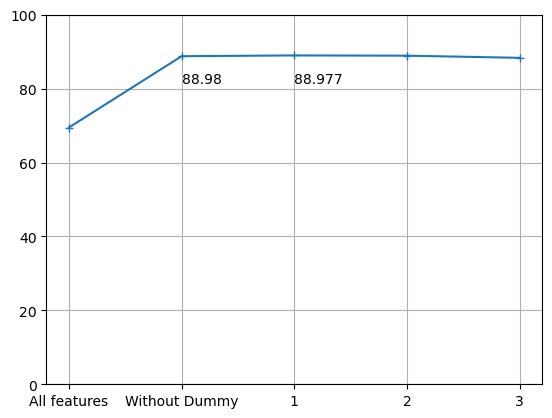

In [186]:
max_val = max(test_naive_accuracies)
max_index = test_naive_accuracies.index(max_val)

plt.plot(features, test_naive_accuracies, "-+")
plt.annotate(round(max_val, 2), (features[max_index], max_val), textcoords="offset points", xytext=(0, -20), ha='left')
plt.annotate(round(test_naive_accuracies[2], 3), (features[3], test_naive_accuracies[3]), textcoords="offset points", xytext=(0, -20), ha='left')
plt.grid(True)
plt.ylim(0,100)
plt.show()max_val = max(test_naive_accuracies)
max_index = test_naive_accuracies.index(max_val)

plt.plot(features, test_naive_accuracies, "-+")
plt.annotate(round(max_val, 2), (features[max_index], max_val), textcoords="offset points", xytext=(0, -20), ha='left')
plt.annotate(round(test_naive_accuracies[2], 3), (features[3], test_naive_accuracies[3]), textcoords="offset points", xytext=(0, -20), ha='left')
plt.grid(True)
plt.ylim(0,100)
plt.show()

In [187]:
# plot of number of features vs train accuracy

train_naive_accuracies = [accuracy_1_train, accuracy_2_train, accuracy_3_train, accuracy_4_train, accuracy_5_train]
features = ["All features", "Without Dummy", 1, 2, 3]

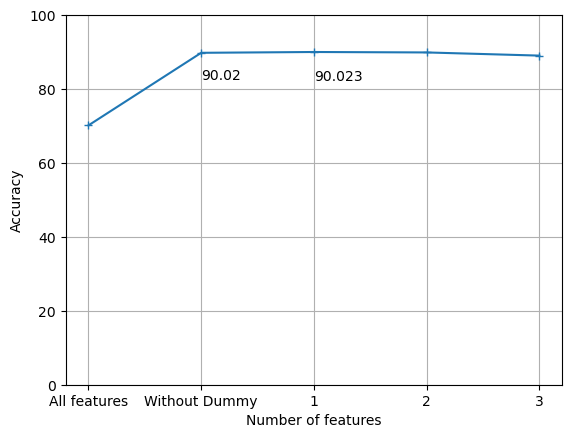

In [188]:
max_val = max(train_naive_accuracies)
max_index = train_naive_accuracies.index(max_val)

plt.plot(features, train_naive_accuracies, "-+")
plt.annotate(round(max_val, 2), (features[max_index], max_val), textcoords="offset points", xytext=(0, -20), ha='left')
plt.annotate(round(train_naive_accuracies[2], 3), (features[3], train_naive_accuracies[3]), textcoords="offset points", xytext=(0, -20), ha='left')
plt.grid(True)
plt.ylim(0,100)
plt.xlabel("Number of features")
plt.ylabel("Accuracy")
plt.show()

Like the test accuracy plot, in the train accuracy also similiar observations can be concluded. The accuracy of the model is seen incresed while created without dummy variables than dummy variables. Also, it is seen that the addition is making any changes in the accuracy of the model.

In [189]:
test_naive_accuracies = [accuracy_1_test, accuracy_2_test, accuracy_3_test, accuracy_4_test, accuracy_5_test]
train_naive_accuracies = [accuracy_1_train, accuracy_2_train, accuracy_3_train, accuracy_4_train, accuracy_5_train]
features = ["All features", "Without Dummy", 1, 2, 3]

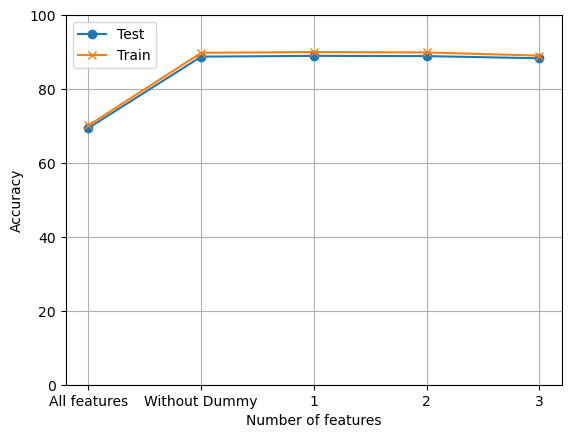

In [190]:
plt.plot(features, test_naive_accuracies, "-o")
plt.plot(features, train_naive_accuracies, "-x")
plt.grid(True)
plt.legend(["Test", "Train"])
plt.ylim(0,100)
plt.xlabel("Number of features")
plt.ylabel("Accuracy")
plt.show()

From the above plot, it is evident that the accuarcy of the model created without dummy and the accuracy of the model created with one mostly correlated feature gives the same accuarcy.  So the class of the target variable can be predicted using just one variable , that is, 'WLTP Metric High'.Moreover, even when the number of feature got increased there is no significant changes in the accuracy of the model.So one feature is sufficient to predict the class of the target variable.

The selected model is the model created with the mostly correlated feature 'WLTP Metric High' with test acccuracy 89.60%. The model is good as the model is neither underfitting nor overfitting and can predict the class of target variable using just one feature.

#### ROC Area under curve Value

In [233]:
# predict probabilities
preds = naive_model_3.predict_proba(X_test_naive[['WLTP Metric High']])

roc_auc = roc_auc_score(y_test_multi,preds, multi_class='ovr')
print(roc_auc)

0.9283796576154009


The ROC area under the curve value of Best naive bayes is shown below. The Area under the curve is 0.92, which is a very good value for the model.
This shows that it can effectively distinguish between two classes, in this case it is High and Low.

## Model Comparison

Three models have been created above. They are,

1. SVC
2. Neural network with sigmoid activation function
3. Naive Bayes Model

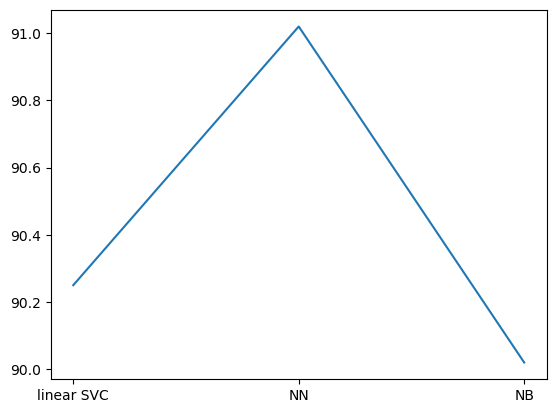

In [237]:
best_accuracies = [90.25, 91.02, 90.02]
models = ["linear SVC", "NN", "NB"]

plt.plot(models, best_accuracies)

The Training accuracies of three models have been plotted above.

Even though there are differences between the accuracies,it is not that significant.

Neural network is showing highest accuracy among them.

Linear SVC and Naive bayes models only use one feature to predict values unlike neural network.